In [3]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\Desktop\PDFfiller - ss5 form_files\Him\ds_salary_proj-master\glassdoor_jobs.csv',index_col=[0])

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 112.0+ KB


In [7]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [8]:
df=df[df['Salary Estimate']!='-1']
df.reset_index(inplace=True)

## Data Cleaning:

In [9]:
# here we have added  three new  columns as max,min, and Average salary and done some data claening in salary _estimate column:

In [10]:
salary=df['Salary Estimate'].str.split('(').str[0].str.replace('$','').str.replace('K','').str.replace('Employer Provided Salary:','').str.replace('Per Hour','')

In [11]:
df['Min_Sal']=salary.str.split('-').str[0].astype('int')

In [12]:
df['Max_Sal']=salary.str.split('-').str[1].astype('int')

In [13]:
df['Avg_Sal']=(df['Min_Sal']+df['Max_Sal'])/2

In [14]:
# we only want company name instead of its rating so
df['Company Name']=df['Company Name'].str.split('\n').str[0]

In [15]:
df['State']=df['Location'].str.split(',').str[1]

In [16]:
df['same_state']=df.apply(lambda x:1 if x.Location==x.Headquarters else 0,axis=1)

In [17]:
## Here we see some skilss in description and craete columns based on such skills
Skills=['python','aws','spark','excel']

In [18]:
def skill(df,x,n):
    df[n]=df[x].apply(lambda x:1 if n in x.lower() else 0)

In [19]:
for i in Skills:
    skill(df,'Job Description',i)

In [20]:
df['python'].value_counts()

1    392
0    350
Name: python, dtype: int64

In [21]:
df['r']=df['Job Description'].apply(lambda x:1 if 'r-studio'in x.lower() or 'r studio' in x.lower() else 0)

In [22]:
df.r.value_counts()

0    740
1      2
Name: r, dtype: int64

In [23]:
df['Age']=df['Founded'].apply(lambda x:x if x<1 else 2020-x)

In [24]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [25]:
# we have so many title so we would make it to fixed title.
def Fixed_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [26]:
df['Fixed Title']=df['Job Title'].apply(Fixed_title)

In [27]:
df['Fixed Title'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: Fixed Title, dtype: int64

In [28]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [29]:
df['seniority'] = df['Job Title'].apply(seniority)

In [30]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [31]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [32]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [33]:
df['hourly']=df['Salary Estimate'].apply(lambda x:1 if 'hour' in x.lower() else 0)

In [34]:
df['hourly'].value_counts()

0    718
1     24
Name: hourly, dtype: int64

In [35]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_Sal', 'Max_Sal', 'Avg_Sal', 'State', 'same_state', 'python', 'aws',
       'spark', 'excel', 'r', 'Age', 'Fixed Title', 'seniority', 'desc_len',
       'num_comp', 'hourly'],
      dtype='object')

In [36]:
df['Min_Sal']=df.apply(lambda x:x.Min_Sal*2 if x.hourly==1 else x.Min_Sal,axis=1)

In [37]:
df['Max_Sal']=df.apply(lambda x:x.Max_Sal*2 if x.hourly==1 else x.Max_Sal,axis=1)

In [38]:
df[df.hourly ==1][['hourly','Min_Sal','Max_Sal']]

,hourly,Min_Sal,Max_Sal
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [39]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Sal,Max_Sal,Avg_Sal,State,same_state,python,aws,spark,excel,r,Age,Fixed Title,seniority,desc_len,num_comp,hourly
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,0,1,0,0,1,0,47,data scientist,na,2536,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,0,1,0,0,0,0,36,data scientist,na,4783,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,1,1,0,1,1,0,10,data scientist,na,3461,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,1,1,0,0,0,0,55,data scientist,na,3883,3,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,1,1,0,0,1,0,22,data scientist,na,2728,3,0


## 2. EDA-Exploratory Data Analysis:

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,742.0,469.129380,279.793117,0.0,221.5,472.5,707.75,955.0
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.00,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.00,2019.0
Min_Sal,742.0,74.719677,30.980593,15.0,52.0,69.5,91.00,202.0
Max_Sal,742.0,128.149596,45.220324,16.0,96.0,124.0,155.00,306.0
Avg_Sal,742.0,100.626011,38.855948,13.5,73.5,97.5,122.50,254.0
same_state,742.0,0.557951,0.496965,0.0,0.0,1.0,1.00,1.0
python,742.0,0.528302,0.499535,0.0,0.0,1.0,1.00,1.0
aws,742.0,0.237197,0.425651,0.0,0.0,0.0,0.00,1.0
spark,742.0,0.225067,0.417908,0.0,0.0,0.0,0.00,1.0


In [41]:
#Lets plot some continuous varible:
c_var=['Max_Sal','Min_Sal','Avg_Sal','Age']

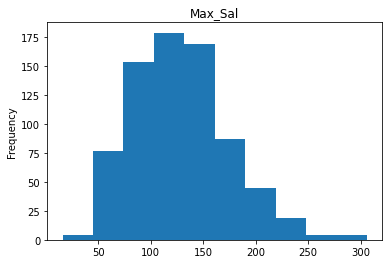

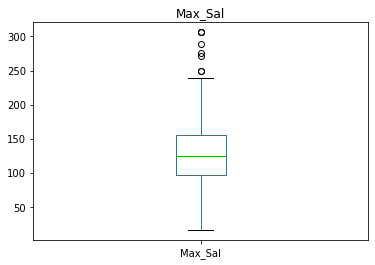

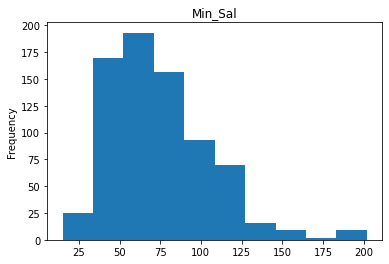

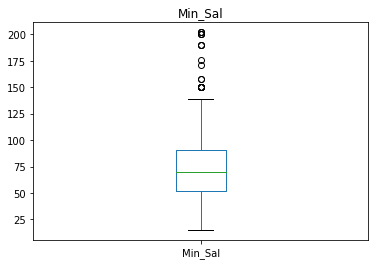

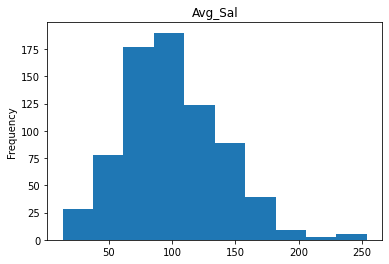

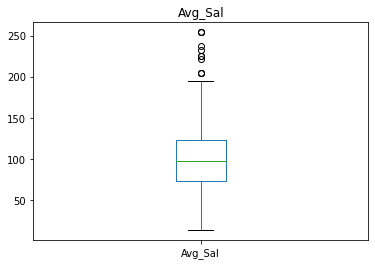

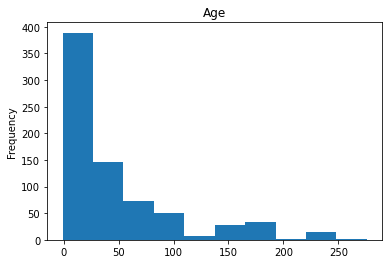

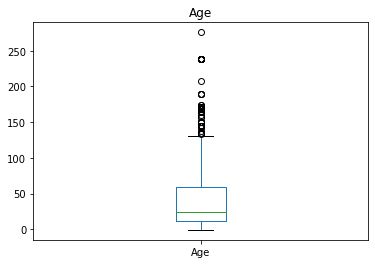

In [42]:
for i in c_var:
    df[i].plot.hist()
    plt.title(i)
    plt.show()
    df[i].plot.box()
    plt.title(i)
    plt.show()

In [43]:
pd.pivot_table(df, index = 'Fixed Title', values = 'Avg_Sal')

,Avg_Sal
Fixed Title,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [44]:
pd.pivot_table(df, index = ['Fixed Title','seniority'], values = 'Avg_Sal')

Avg_Sal
Fixed Title    seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [45]:

pd.pivot_table(df, index = ['State','Fixed Title'], values = 'Avg_Sal', aggfunc = 'count').sort_values('Fixed Title', ascending = False)

,,Avg_Sal
State,Fixed Title,
MD,na,16
NE,na,4
IL,na,6
IN,na,4
KY,na,4
...,...,...
NY,analyst,14
OH,analyst,4
CA,analyst,18


In [46]:
pd.pivot_table(df[df['Fixed Title'] == 'data scientist'], index = 'State', values = 'Avg_Sal').sort_values('Avg_Sal', ascending = False)

,Avg_Sal
State,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [47]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_Sal', 'Max_Sal', 'Avg_Sal', 'State', 'same_state', 'python', 'aws',
       'spark', 'excel', 'r', 'Age', 'Fixed Title', 'seniority', 'desc_len',
       'num_comp', 'hourly'],
      dtype='object')

In [48]:
cat_var=['Headquarters','Industry','State','Competitors','Company Name','Sector']

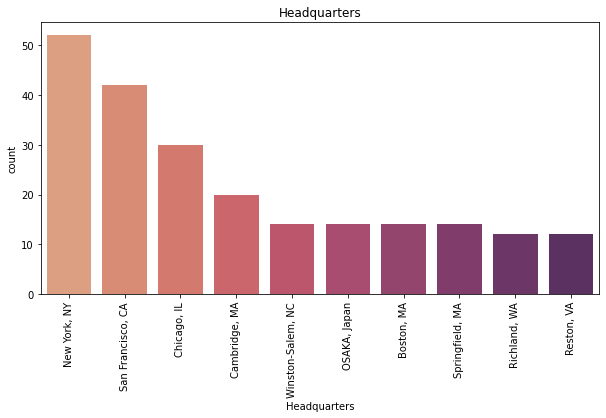

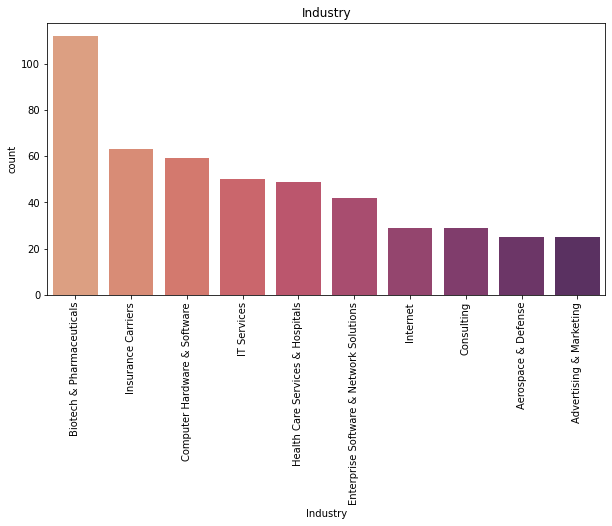

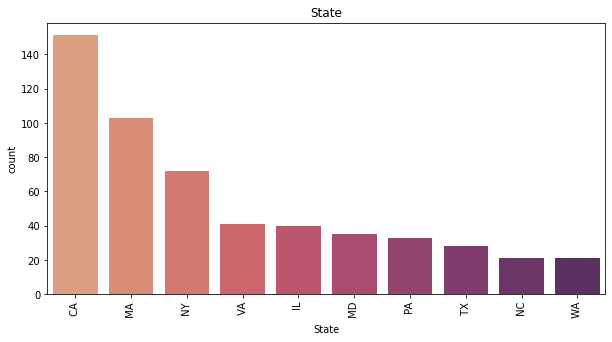

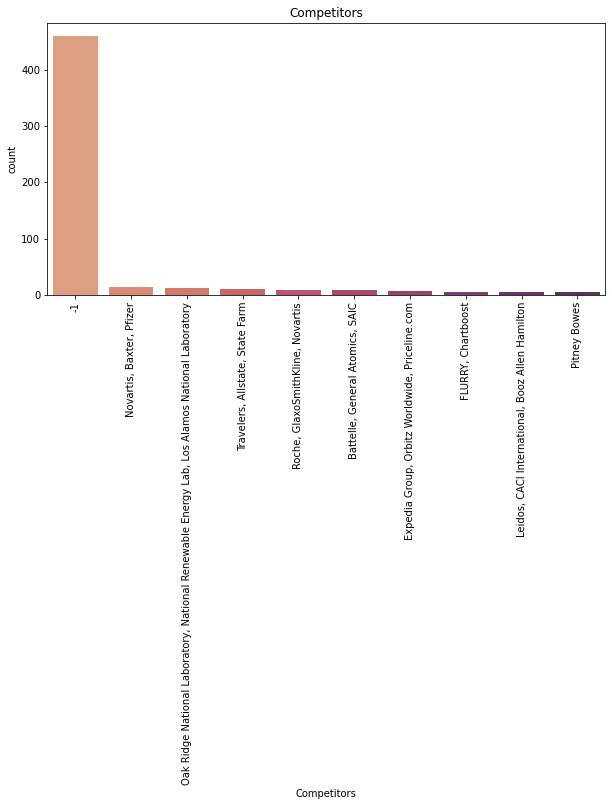

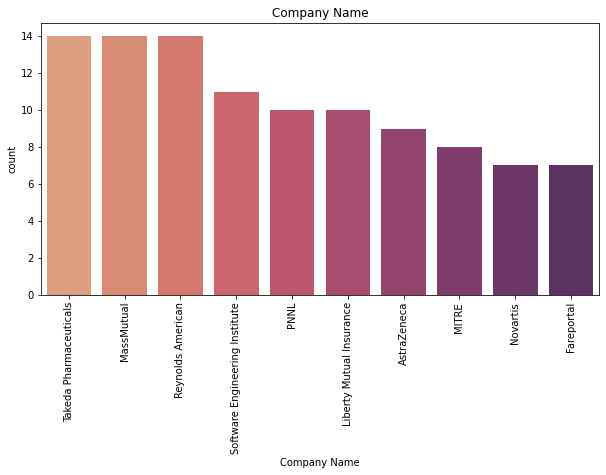

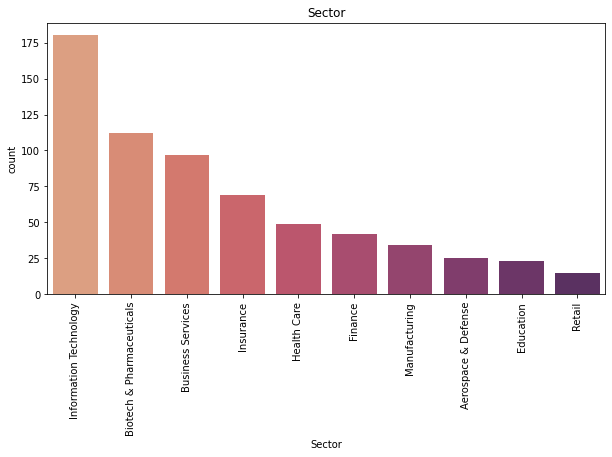

In [49]:
for i in cat_var:
    plt.figure(figsize=((10,5)))
    sns.countplot(x=df[i],order = df[i].value_counts()[:10].index,palette='flare')
    plt.xticks(rotation='vertical')
    plt.title(i)
    plt.show()

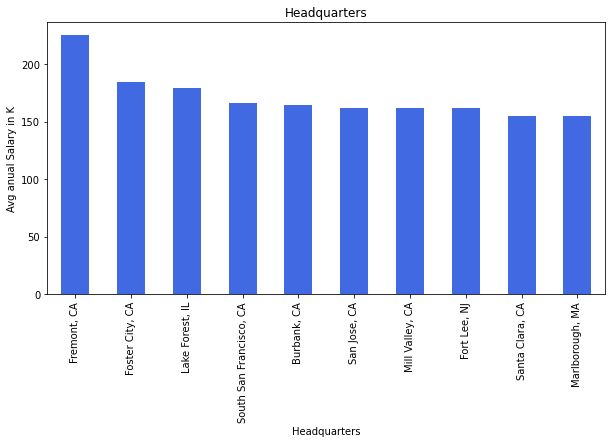

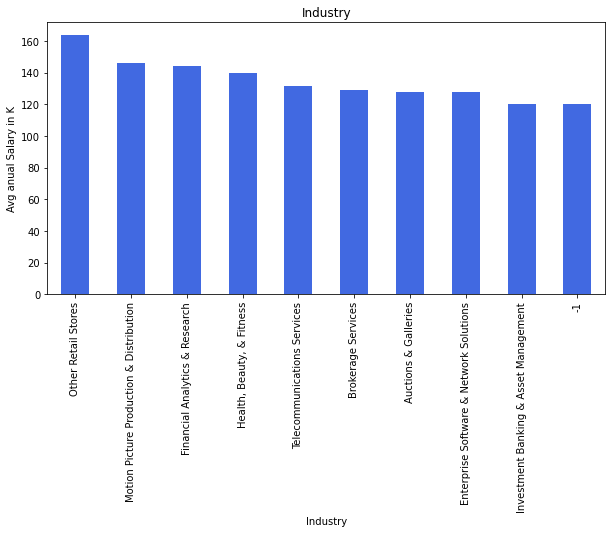

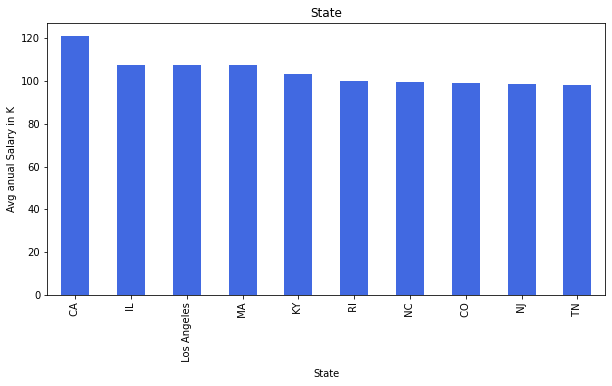

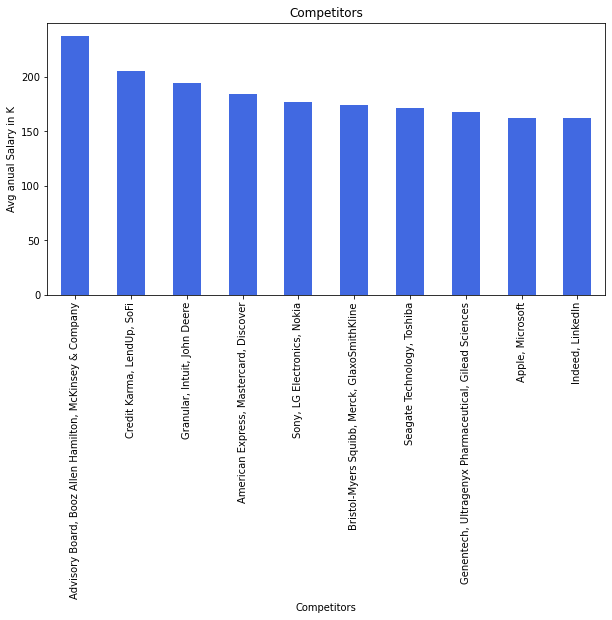

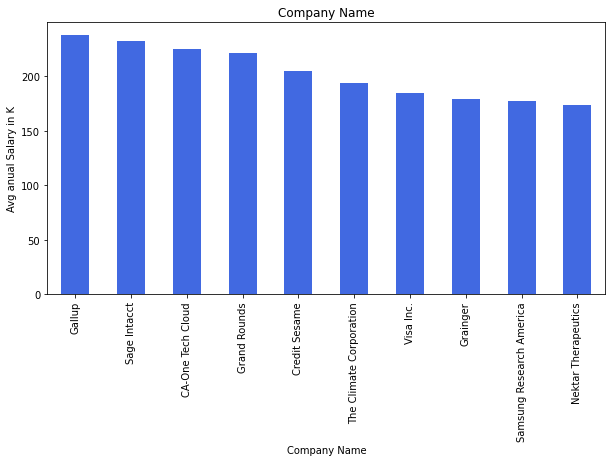

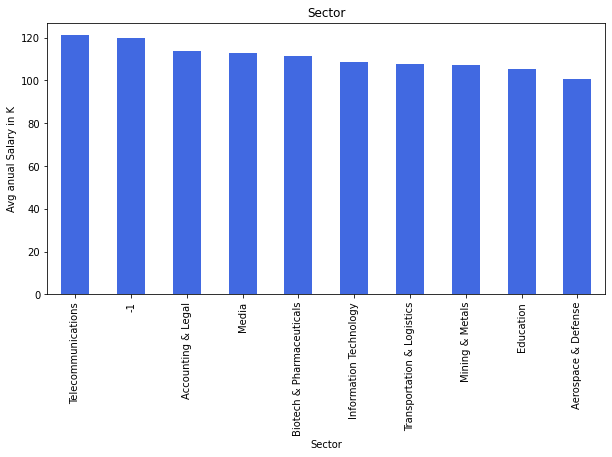

In [50]:
for i in cat_var:
    plt.figure(figsize=((10,5)))
    temp_df=df.groupby([i])['Avg_Sal'].median()
    temp_df.sort_values(ascending=False)[:10].plot.bar(color='#4169E1')
    plt.title(i)
    plt.ylabel('Avg anual Salary in K')
    plt.show();

In [51]:
# Lets Find Keyword From Job Description:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Rose Garden
[nltk_data]     Inn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rose Garden
[nltk_data]     Inn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

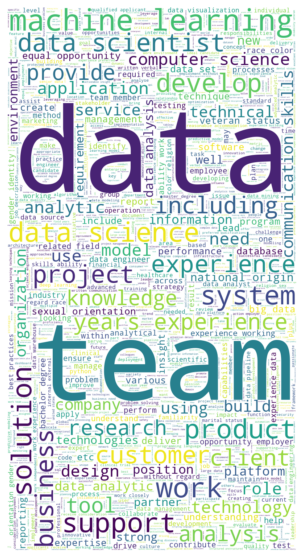

In [52]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


## 3. Model Building:

In [53]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_Sal', 'Max_Sal', 'Avg_Sal', 'State', 'same_state', 'python', 'aws',
       'spark', 'excel', 'r', 'Age', 'Fixed Title', 'seniority', 'desc_len',
       'num_comp', 'hourly'],
      dtype='object')

In [54]:
df_model = df[['Avg_Sal','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly',
             'State','same_state','Age','python','spark','aws','excel','Fixed Title','seniority','desc_len']]

In [55]:
df_model

,Avg_Sal,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,State,same_state,Age,python,spark,aws,excel,Fixed Title,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,NM,0,47,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,MD,0,36,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,FL,1,10,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,WA,1,55,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,NY,1,22,1,0,0,1,data scientist,na,2728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,MA,0,190,0,0,1,0,na,senior,6162
738,102.5,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),3,0,TN,0,14,1,1,1,0,data engineer,senior,6130
739,73.5,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,PA,1,36,0,0,0,1,na,na,3078
740,127.5,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,PA,0,-1,0,0,0,1,manager,na,1642


In [56]:
df_dum=pd.get_dummies(df_model)

In [57]:
df_dum

,Avg_Sal,Rating,num_comp,hourly,same_state,Age,python,spark,aws,excel,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,State_ AL,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ Los Angeles,State_ MA,State_ MD,State_ MI,State_ MN,State_ MO,State_ NC,State_ NE,State_ NJ,State_ NM,State_ NY,State_ OH,State_ OR,State_ PA,State_ RI,State_ SC,State_ TN,State_ TX,State_ UT,State_ VA,State_ WA,State_ WI,Fixed Title_analyst

In [347]:

# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('Avg_Sal', axis =1)
y = df_dum.Avg_Sal.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [348]:
X_train

,Rating,num_comp,hourly,same_state,Age,python,spark,aws,excel,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,State_ AL,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ Los Angeles,State_ MA,State_ MD,State_ MI,State_ MN,State_ MO,State_ NC,State_ NE,State_ NJ,State_ NM,State_ NY,State_ OH,State_ OR,State_ PA,State_ RI,State_ SC,State_ TN,State_ TX,State_ UT,State_ VA,State_ WA,State_ WI,Fixed Title_analyst,Fixed T

In [349]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))



-20.671940180995733

C:\Users\Rose Garden Inn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.78459939948516, tolerance: 57.224473989898996
  model = cd_fast.enet_coordinate_descent(


,alpha,error
11,0.12,-19.331611


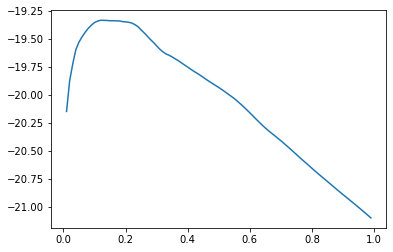

In [350]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [351]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(criterion='mae', n_estimators=90)

In [352]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

19.2864784592528
19.82460767910115
11.001938851603283


14.489342453858253

In [353]:
import pickle
file=open('C:\\Users\\Desktop\\PDFfiller - ss5 form_files\\Him\\mlmodel.pkl','wb')
pickle.dump(gs,file)


## Feature Engineering and Feature Selection:

In [88]:
for i in df_model.columns:
        print(i,'Has No of category',df_model[i].nunique(25))


Avg_Sal Has No of category 225
Rating Has No of category 31
Size Has No of category 9
Type of ownership Has No of category 11
Industry Has No of category 60
Sector Has No of category 25
Revenue Has No of category 14
num_comp Has No of category 5
hourly Has No of category 2
State Has No of category 38
same_state Has No of category 2
Age Has No of category 102
python Has No of category 2
spark Has No of category 2
aws Has No of category 2
excel Has No of category 2
Fixed Title Has No of category 7
seniority Has No of category 3
desc_len Has No of category 443


In [113]:
for i in df_model['State'].value_counts()[:10].keys().str.strip():
    df_model[i]=np.where(df_model['State'].str.strip()==i,1,0)
    

<ipython-input-113-bf66a544719a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[i]=np.where(df_model['State'].str.strip()==i,1,0)


In [108]:
df['State'].value_counts()[:10].keys().str.strip()

Index(['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA'], dtype='object')

In [220]:
df_model['Size']=df_model['Size'].apply(lambda x:x.strip())

<ipython-input-220-1c55f5918429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Size']=df_model['Size'].apply(lambda x:x.strip())


In [229]:
dict_l={'1001 to 5000 employees':5,
'501 to 1000 employees':4,
   '10000+ employees':7,           
'201 to 500 employees':3,      
'51 to 200 employees':2,      
'5001 to 10000 employees':6,  
'1 to 50 employees':1,          
'Unknown':0}   

In [231]:
df_model['Size']=df_model['Size'].map(dict_l)

<ipython-input-231-3cdd18bd6dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Size']=df_model['Size'].map(dict_l)


In [247]:
for i in df_model['Type of ownership'].value_counts()[:7].keys().str.strip():
    df_model[i]=np.where(df_model['Type of ownership'].str.strip()==i,1,0)

<ipython-input-247-4da1f6f2436a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[i]=np.where(df_model['Type of ownership'].str.strip()==i,1,0)


In [252]:
df_model.drop(columns=['State','Type of ownership'],inplace=True)

C:\Users\Rose Garden Inn\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [258]:
for i in df_model['Industry'].value_counts()[:15].keys().str.strip():
    df_model[i]=np.where(df_model['Industry'].str.strip()==i,1,0)


<ipython-input-258-86ee6311ae30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[i]=np.where(df_model['Industry'].str.strip()==i,1,0)


In [263]:
df_model.drop(columns=['Industry'],inplace=True)

C:\Users\Rose Garden Inn\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [266]:
df_model.drop(columns=['Sector'],inplace=True)

C:\Users\Rose Garden Inn\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [276]:
temp_df=pd.get_dummies(df_model[['seniority','Fixed Title','Revenue']],drop_first=True)

In [283]:
df_model=df_model.join(temp_df)

In [285]:
df_model.drop(['seniority','Fixed Title','Revenue'],axis=1,inplace=True)

In [289]:
df['num_comp'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [286]:
df_model.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 741
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Avg_Sal                                   741 non-null    float64
 1   Rating                                    741 non-null    float64
 2   Size                                      741 non-null    int64  
 3   num_comp                                  741 non-null    int64  
 4   hourly                                    741 non-null    int64  
 5   same_state                                741 non-null    int64  
 6   Age                                       741 non-null    int64  
 7   python                                    741 non-null    int64  
 8   spark                                     741 non-null    int64  
 9   aws                                       741 non-null    int64  
 10  excel                                 

In [291]:
# Before feature selection lets do some standerdizing to  our variable:

In [292]:
from sklearn.preprocessing import StandardScaler

In [294]:
scaler=StandardScaler()

In [296]:
temp_x=df_model.drop('Avg_Sal',axis=1)

In [297]:
temp_y=df_model['Avg_Sal']

In [298]:
temp_y

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg_Sal, Length: 741, dtype: float64

In [304]:
temp_x=pd.DataFrame(scaler.fit_transform(temp_x),columns=temp_x.columns)

In [305]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_x,temp_y, test_size=0.3, random_state=4)

,alpha,error
61,0.62,-19.794355


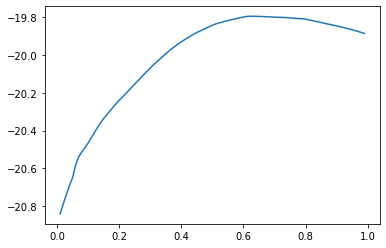

In [306]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [307]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(max_features='sqrt', n_estimators=120)

In [310]:
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))



20.686719631408376
14.229801943198801


In [311]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [330]:
## Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [331]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

In [333]:
selected_feat.nunique()

63

In [338]:
temp_x=temp_x[selected_feat]

In [339]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_x,temp_y, test_size=0.3, random_state=4)

,alpha,error
61,0.62,-19.794355


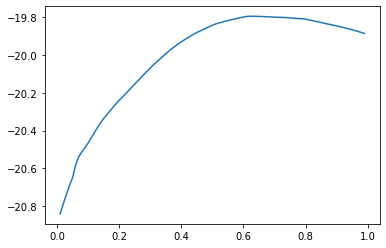

In [341]:
# lasso regression 
lm_l = Lasso(alpha=0.005)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [342]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(max_features='log2', n_estimators=50)

In [343]:
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))


20.81569692086814
14.150269058295965
